# Performing Exploratory Data Analysis on Titanic Data-Set.

In [270]:
# Importing Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [271]:
# Loading the Titanic Data-Set.
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [272]:
# Shape of the dataset
df.shape

(891, 15)

In [273]:
# statistical description of the data.
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [274]:
# The information of the data set. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [275]:
# Dropping the Unwanted Columns.
df = df.drop(['who', 'adult_male', 'alive', 'deck', 'alone', 'class','embark_town'] ,axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [276]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [277]:
df["age"] = df["age"].fillna(df["age"].mean())
df["age"].isnull().sum()

0

In [278]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["embarked"].isnull().sum()

0

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [280]:
# Target: Survived , 6 features.
data = pd.DataFrame(df[["survived","pclass"]])
data

,survived,pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [281]:
crosstab = pd.crosstab(df["pclass"], df["survived"])
crosstab
# The cross-tabulation shows that survival was highest among 1st class passengers, while the majority of non-survivors were from 3rd class
# This suggests that passenger class had a significant impact on survival probability.

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [282]:
pd.crosstab(df["pclass"], df["survived"], normalize="index") * 100
# Survivors and non-survivors in percentage. 

survived,0,1
pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [283]:
# Target variable Analysis.
print(df["survived"].value_counts(normalize= True))
print("\n")
print(df["survived"].value_counts(normalize= True)*100)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


<Axes: xlabel='survived', ylabel='count'>

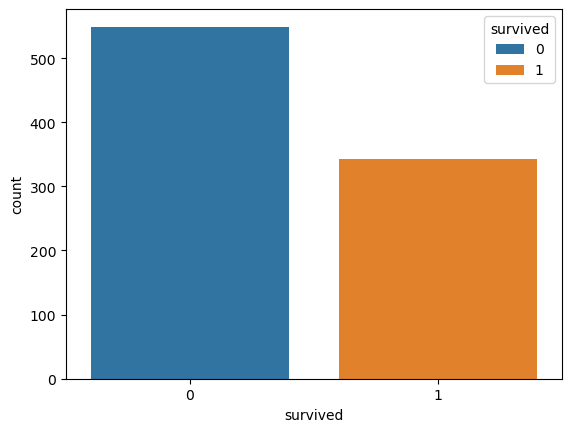

In [284]:
sns.countplot(x="survived",data = df, hue="survived")

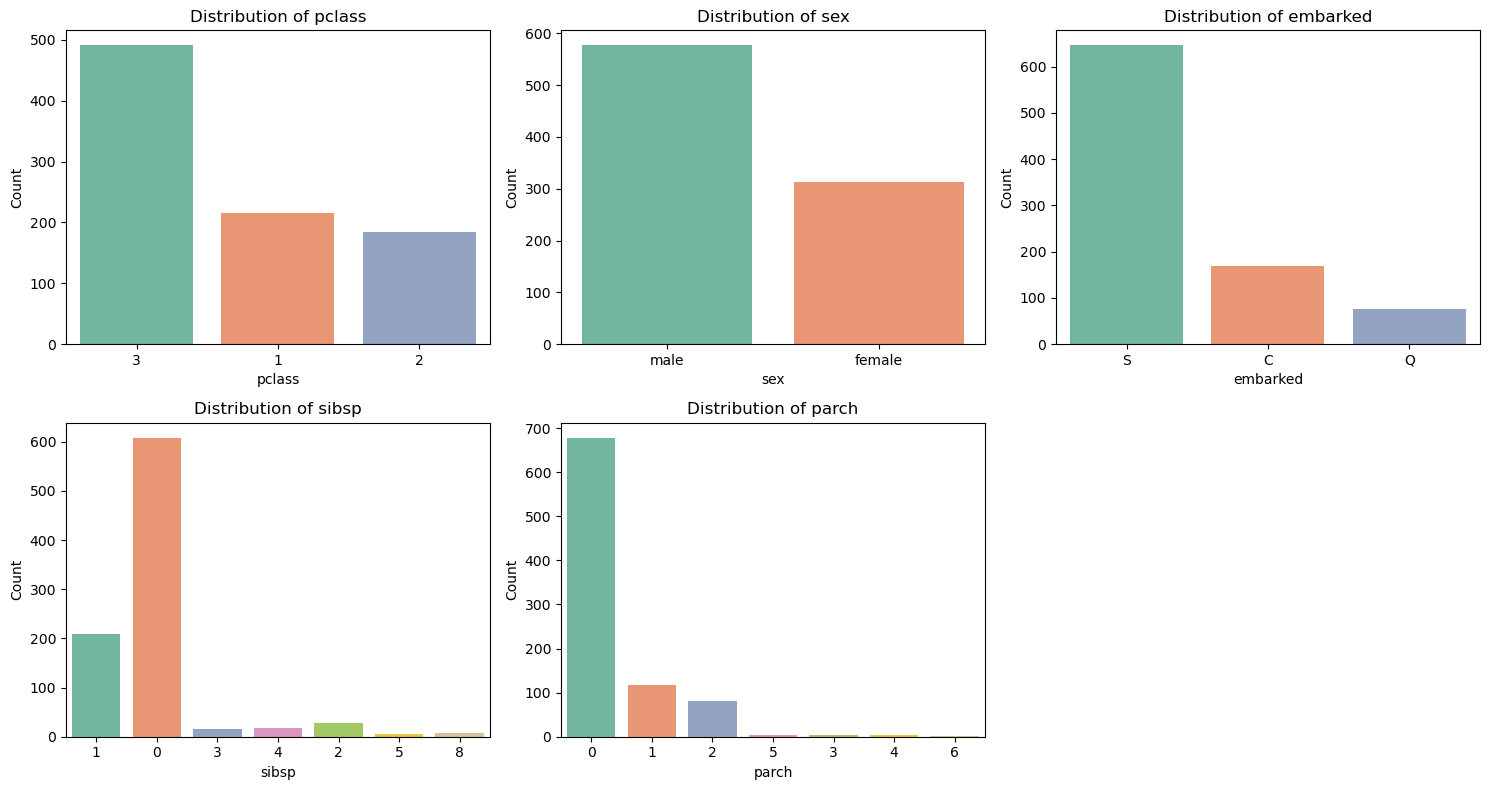

In [285]:
# Univariate Analysis
# Categorical values "pclass","sex","embarked","age","fare","sibsp","parch"


categorical_cols = ["pclass","sex","embarked","sibsp","parch"]

# subplots
fig,axes = plt.subplots(2,3, figsize=(15,8))
axes = axes.flatten()


for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col].astype(str), data = df, ax = axes[i], palette = "Set2",hue=df[col].astype(str))
    axes[i].set_title(f"Distribution of {col}",fontsize=12)
    axes[i].set_ylabel("Count")

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

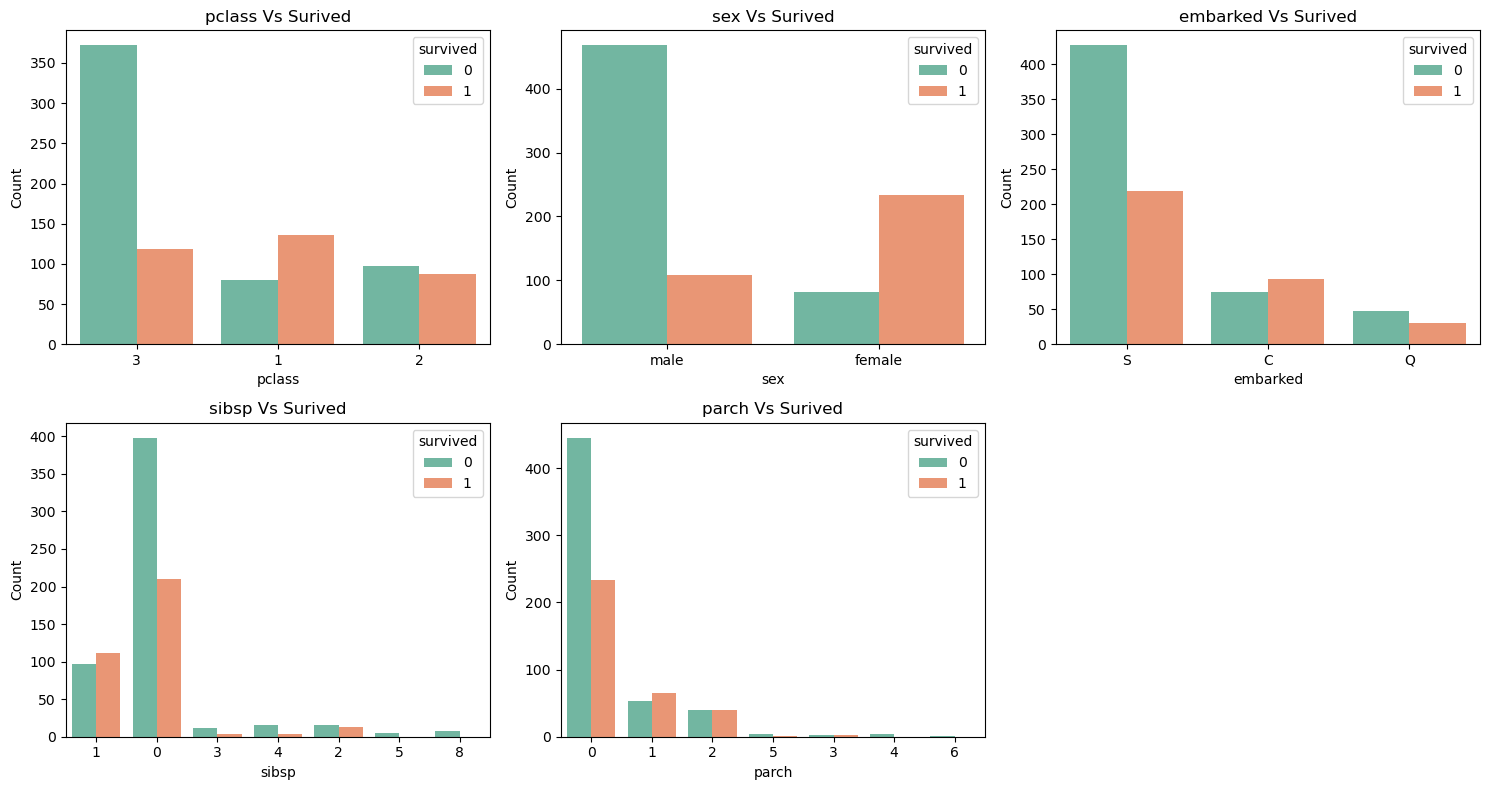

In [286]:
# Bi-variate Analysis.

# subplots
fig,axes = plt.subplots(2,3, figsize=(15,8))
axes = axes.flatten()


for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col].astype(str), data = df, ax = axes[i], palette = "Set2",hue="survived")
    axes[i].set_title(f"{col} Vs Surived",fontsize=12)
    axes[i].set_ylabel("Count")

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


<Axes: xlabel='age'>

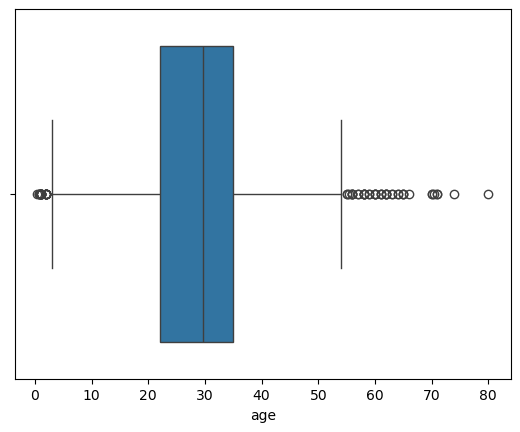

In [287]:
# Outliers
sns.boxplot(x="age",data=df)

In [288]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 66


In [289]:
# Feature Engineering

Bins = [0,12,19,59,100]
labels = ["Child","Teenage","Adult","Senior"]

df["age_group"] = pd.cut(df["age"], bins = Bins, labels= labels)
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_group
886,0,2,male,27.000000,0,0,13.00,S,Adult
887,1,1,female,19.000000,0,0,30.00,S,Teenage
888,0,3,female,29.699118,1,2,23.45,S,Adult
889,1,1,male,26.000000,0,0,30.00,C,Adult
890,0,3,male,32.000000,0,0,7.75,Q,Adult


<Axes: xlabel='age_group', ylabel='count'>

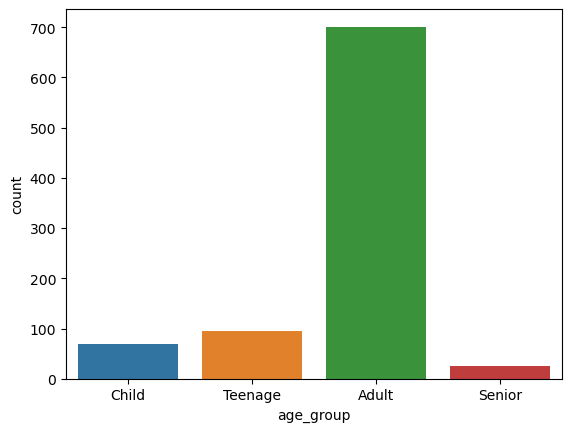

In [290]:
sns.countplot(x="age_group", data = df, hue="age_group")

<Axes: xlabel='fare'>

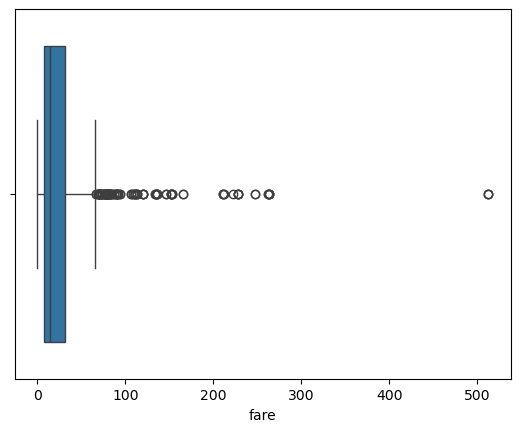

In [291]:
sns.boxplot(x="fare",data=df)

In [292]:
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["fare"] < lower_bound) | (df["fare"] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 116


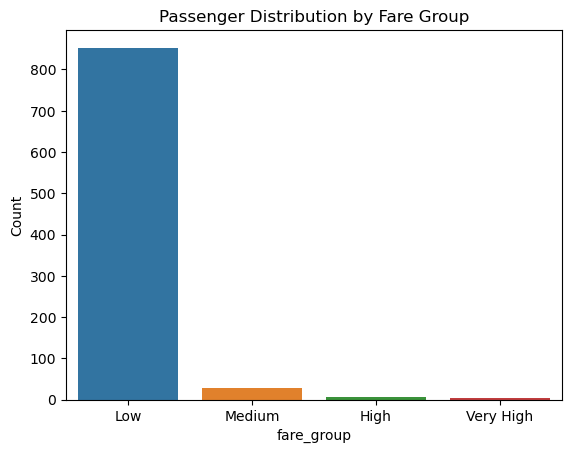

In [293]:
# Fare binning
df["fare_group"] = pd.cut(df["fare"], 4, labels=["Low", "Medium", "High", "Very High"])
sns.countplot(x="fare_group", data = df,hue ="fare_group",legend=False)
plt.title("Passenger Distribution by Fare Group")
plt.ylabel("Count")
plt.show()

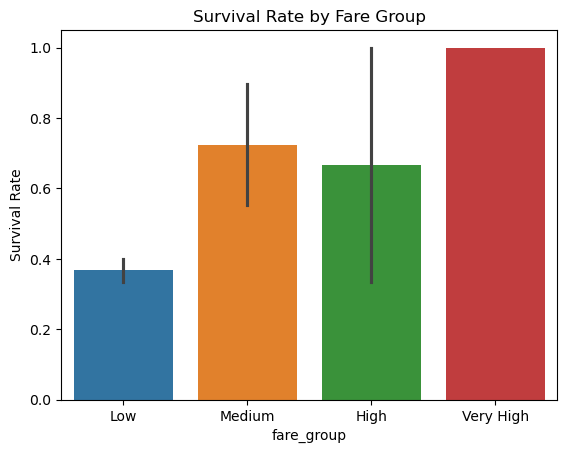

In [294]:
# Fare binning
df["fare_group"] = pd.cut(df["fare"], 4, labels=["Low", "Medium", "High", "Very High"])
sns.barplot(x="fare_group",y= "survived", data = df,hue="fare_group")
plt.title("Survival Rate by Fare Group")
plt.ylabel("Survival Rate")
plt.show()

In [295]:
df["fare_group"].value_counts()

fare_group
Low          853
Medium        29
High           6
Very High      3
Name: count, dtype: int64

In [296]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df["sex"]


lb.classes_

array(['female', 'male'], dtype=object)

In [297]:
df["embarked"] = lb.fit_transform(df["embarked"])

for i, cls in enumerate(lb.classes_):
    print(f"{cls} --> {i}")

C --> 0
Q --> 1
S --> 2


<Axes: >

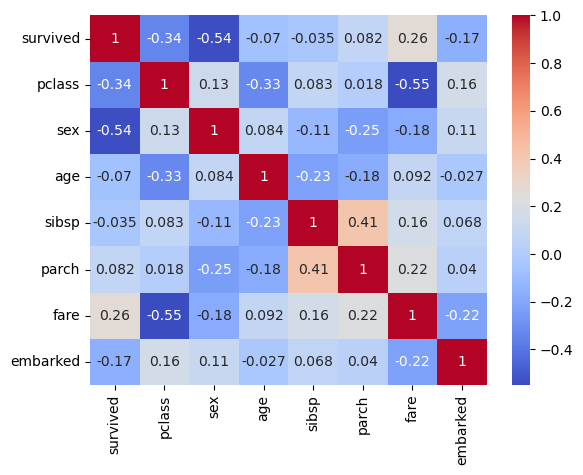

In [298]:
# Multi-variate Analysis
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap ="coolwarm")

In [299]:
df = df.drop(["age","fare"],axis = 1)

In [300]:
df = pd.get_dummies(df, columns =["fare_group","age_group"],drop_first =True,dtype=int)

In [301]:
df.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked',
       'fare_group_Medium', 'fare_group_High', 'fare_group_Very High',
       'age_group_Teenage', 'age_group_Adult', 'age_group_Senior'],
      dtype='object')

In [302]:
# Training and testing data

X = df.drop("survived",axis = 1) #feature
y = df["survived"] #target

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 42, stratify =y)


In [303]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)
print("Survival distribution in train:", y_train.value_counts(normalize=True))
print("Survival distribution in test:", y_test.value_counts(normalize=True))


Train shape: (623, 11) (623,)
Test shape : (268, 11) (268,)
Survival distribution in train: survived
0    0.616372
1    0.383628
Name: proportion, dtype: float64
Survival distribution in test: survived
0    0.615672
1    0.384328
Name: proportion, dtype: float64


In [304]:
# Model Fitting

# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter = 1000)

# Train model
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [305]:
y_pred = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8022388059701493

Confusion Matrix:
 [[144  21]
 [ 32  71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       165
           1       0.77      0.69      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [306]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.7910447761194029

Confusion Matrix:
 [[137  28]
 [ 28  75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       165
           1       0.73      0.73      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



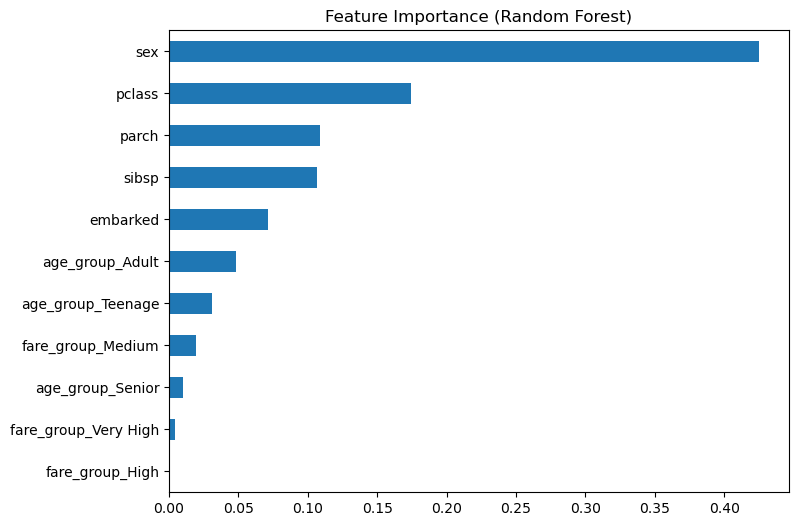

In [307]:


feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()


In [308]:
import numpy as np
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0],
    "Odds_Ratio": np.exp(log_reg.coef_[0])   # exponentiate to get survival odds
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

# Logistic Regression confirms the classic Titanic story — “Women and children in 1st class with higher fares had the best survival odds. Men, 3rd class passengers, and seniors had the worst odds.”


                 Feature  Coefficient  Odds_Ratio
7   fare_group_Very High     0.424322    1.528554
6        fare_group_High     0.202268    1.224176
3                  parch    -0.119973    0.886944
5      fare_group_Medium    -0.138348    0.870796
4               embarked    -0.219743    0.802725
2                  sibsp    -0.337740    0.713380
0                 pclass    -0.915472    0.400328
8      age_group_Teenage    -1.257627    0.284328
9        age_group_Adult    -1.476875    0.228350
10      age_group_Senior    -1.853303    0.156719
1                    sex    -2.631034    0.072004
